In [7]:
import math

def distribucion_binomial(numero_exitos, ensayos, probabilidad_exito):
    """
    Calcula la distribución binomial.

    Parámetros:
    - numero_exitos (int): El número de éxitos que deseas calcular.
    - ensayos (int): El número total de ensayos.
    - probabilidad_exito (float): La probabilidad de éxito en cada ensayo.

    Retorna:
    - probabilidad (float): La probabilidad de obtener el número dado de éxitos en los ensayos dados.
    """
    combinaciones = math.comb(ensayos, numero_exitos)
    probabilidad_exito_n = probabilidad_exito ** numero_exitos
    probabilidad_fracaso_n = (1 - probabilidad_exito) ** (ensayos - numero_exitos)
    probabilidad = combinaciones * probabilidad_exito_n * probabilidad_fracaso_n
    return probabilidad

# Ejemplo de uso:
numero_exitos = 0
ensayos = 3
probabilidad_exito = 0.28

probabilidad = distribucion_binomial(numero_exitos, ensayos, probabilidad_exito)
print(f"La probabilidad de obtener {numero_exitos} éxitos en {ensayos} ensayos con una probabilidad de éxito de {probabilidad_exito} es: {probabilidad}")

La probabilidad de obtener 0 éxitos en 3 ensayos con una probabilidad de éxito de 0.28 es: 0.37324799999999997


In [11]:
import math

def poisson(k, lmbda):
    """Calcula la probabilidad de k eventos en un intervalo dado con tasa media lambda."""
    return math.exp(-lmbda) * (lmbda ** k) / math.factorial(k)

# Ejemplo:
lmbda = 2.02  # Tasa media de eventos
intervalo = 1  # Intervalo de tiempo o espacio
k = 0 # Número de eventos que queremos calcular

probabilidad = poisson(k, lmbda)
print(f"La probabilidad de {k} eventos en un intervalo de {intervalo} con una tasa media de {lmbda} es: {probabilidad}")


La probabilidad de 0 eventos en un intervalo de 1 con una tasa media de 2.02 es: 0.13265546508012172


In [16]:
import math
import scipy.stats as st

# Datos
a = 0.05
columnas = [[35, 20], [42, 19], [58, 6]]

# Se calcula el total general y los totales por fila y columna
TotalGeneral = sum(sum(columna) for columna in columnas)
TotalFila = [sum(columna) for columna in columnas]
TotalColumna = [sum(fila[i] for fila in columnas) for i in range(len(columnas[0]))]

# Se calculan los valores esperados (Ei) para cada columna
Ei = [[round((fila_total * columna_total) / TotalGeneral, 3) for columna_total in TotalColumna] for fila_total in TotalFila]

# Se calcula el chi-cuadrado observado (XiCalculado)
sumandos_XiCalculado = []
for fila in range(len(columnas)):
    for columna in range(len(columnas[0])):
        Oi = columnas[fila][columna]
        Ei_valor = Ei[fila][columna]
        sumando = ((Oi - Ei_valor) ** 2) / Ei_valor
        sumandos_XiCalculado.append((Oi, Ei_valor, sumando))
XiCalculado = sum(sumando for _, _, sumando in sumandos_XiCalculado)

# Se calcula el chi-cuadrado tabular (XiTabular)
gl = (len(TotalFila) - 1) * (len(TotalColumna) - 1)
XiTabular = round(st.chi2.ppf(1 - a, gl), 3)

# Mostrar resultados en formato Markdown
print("## Resultados")
print("| Fila | Columna | Oi | Ei | (Oi - Ei)^2 / Ei |")
print("|------|---------|----|----|-------------------|")
for i, (Oi, Ei_valor, sumando) in enumerate(sumandos_XiCalculado):
    fila = i // len(columnas[0]) + 1
    columna = i % len(columnas[0]) + 1
    print(f"| {fila} | {columna} | {Oi} | {Ei_valor} | {sumando} |")

print("\n- Total Columna:", TotalColumna)
print("- Total Fila:", TotalFila)
print("- Total General:", TotalGeneral)
print("- Xi cuadrado Calculado:", XiCalculado)
print("- Xi cuadrado Tabular:", XiTabular)

# Conclusion de la Hipotesis
if XiCalculado <= XiTabular:
    print("### Conclusion: (XiCalculado <= XiTabular) Se Acepta H0")
else:
    print("### Conclusion: (XiCalculado > XiTabular) Se Rechaza H0")


## Resultados
| Fila | Columna | Oi | Ei | (Oi - Ei)^2 / Ei |
|------|---------|----|----|-------------------|
| 1 | 1 | 35 | 41.25 | 0.946969696969697 |
| 1 | 2 | 20 | 13.75 | 2.840909090909091 |
| 2 | 1 | 42 | 45.75 | 0.3073770491803279 |
| 2 | 2 | 19 | 15.25 | 0.9221311475409836 |
| 3 | 1 | 58 | 48.0 | 2.0833333333333335 |
| 3 | 2 | 6 | 16.0 | 6.25 |

- Total Columna: [135, 45]
- Total Fila: [55, 61, 64]
- Total General: 180
- Xi cuadrado Calculado: 13.350720317933433
- Xi cuadrado Tabular: 5.991
### Conclusion: (XiCalculado > XiTabular) Se Rechaza H0


# Solucion Propia
## Prueba de Independencia
Ejercicio 5

Para estudiar la dependencia entre la depresion y el estado Civil se seleciono una muestra aleatoria sirmple de 180 hombres y mujeres. La cual se detalla en el siguiente cuadro:

![ejercicio5](../Images/S7Ej5.png)

Determinar si existe independencia entre la depresión y estado civil de una persona a un nivel de significacion de 5%.

1 . **Planteamiento de la hipotesis**

* H0: No existe relación entre la depresion y el estado civil
* H1: Existe relación entre la depresion y el estado civil

**Datos relevantes:**
- Nivel de Significacion ($\alpha$) = 0.05

In [17]:
import math
import scipy.stats as st

# Datos
a = 0.05
columna1 = [35,20]
columna2 = [42,19]
columna3 = [58,6]

# Se calcula la Frecuencia Esperada
# Se calcula el total general
TotalGeneral = sum(columna1) + sum(columna2)+sum(columna3) 

# Se calcula el total por fila
TotalFila = []
for posC,num in enumerate(columna1):
    valor = num + columna2[posC] + columna3[posC] 
    TotalFila.append(valor)

# Se calcula el total por columna
TotalColumna = [sum(columna1),sum(columna2),sum(columna3)]

# Se calcula Ei para cada columna, se conserva la forma
Ei1=[]
Ei2=[]
Ei3=[]
for posC,numero in enumerate(TotalFila):
    valor1 = round((numero*TotalColumna[0])/TotalGeneral,3)
    valor2 = round((numero*TotalColumna[1])/TotalGeneral,3)
    valor3 = round((numero*TotalColumna[2])/TotalGeneral,3)  
    Ei1.append(valor1)
    Ei2.append(valor2)
    Ei3.append(valor3)

# Hallamos Xi cuadrado Calculado
OiEi_2_Ei = []
# Hacemos las columnas una sola, tambien valores de Ei
ColumnaG = columna1+columna2+columna3
Ei = Ei1+Ei2+Ei3
XiCalculado = 0
for posC,numero in enumerate(ColumnaG):
    valor1 = round(numero-Ei[posC],3)
    valor2 = round(valor1**2,3)
    valor3 = round(valor2/Ei[posC],3)
    XiCalculado +=valor3
    OiEi_2_Ei.append(valor3)

# Hallamos Xi Tabular
gl = (len(TotalFila)-1)*(len(TotalColumna)-1)
XiTabular = round(st.chi2.ppf(1-a,gl),3)

print("Oi =",columna1)
print("Ei =",Ei1)
print("Oi =",columna2)
print("Ei =",Ei2)
print("Oi =",columna3)
print("Ei =",Ei3)
print("\nTotal Columna =",TotalColumna)
print("Total Fila =",TotalFila)
print("Total General =",TotalGeneral)
print("Xi cuadrado Calculado = ",OiEi_2_Ei,"\nXiCalculado =",XiCalculado)
print("Xi Tabular",XiTabular)

# Conclusion de la Hipotesis
if XiCalculado <= XiTabular:
    print("Conclusion: (XiCalculado <= XiTabular) Se Acepta H0")
else:
    print("Conclusion: (XiCalculado > XiTabular) Se Rechaza H0")

Oi = [35, 20]
Ei = [41.25, 13.75]
Oi = [42, 19]
Ei = [45.75, 15.25]
Oi = [58, 6]
Ei = [48.0, 16.0]

Total Columna = [55, 61, 64]
Total Fila = [135, 45]
Total General = 180
Xi cuadrado Calculado =  [0.947, 2.841, 0.307, 0.922, 2.083, 6.25] 
XiCalculado = 13.350000000000001
Xi Tabular 5.991
Conclusion: (XiCalculado > XiTabular) Se Rechaza H0


In [1]:
def asignar_rangos(diferencias_en_orden, rango_correspondiente, nueva_lista):
    nueva_lista_de_rangos = []
    for valor in nueva_lista:
        indice = diferencias_en_orden.index(valor)  # Obtener el índice del valor en la lista original
        rango = rango_correspondiente[indice]  # Obtener el rango correspondiente
        nueva_lista_de_rangos.append(rango)  # Agregar el rango a la nueva lista
    return nueva_lista_de_rangos

# Listas de datos proporcionadas
diferencias_en_orden = [2, 2, 2, 3, 4, 4, 5, 6, 6, 10]
rango_correspondiente = [1, 1.5, 1.5, 4, 5.5, 5.5, 7, 8.5, 8.5, 10]
nueva_lista = [5, 4, 6, 2, 4, 10, 3, 6, 2, 2]

# Obtener la nueva lista de rangos
nueva_lista_de_rangos = asignar_rangos(diferencias_en_orden, rango_correspondiente, nueva_lista)

# Mostrar la nueva lista de rangos
print("Nueva lista de rangos:")
print(nueva_lista_de_rangos)

Nueva lista de rangos:
[7, 5.5, 8.5, 1, 5.5, 10, 4, 8.5, 1, 1]


In [4]:
def asignar_rangos(diferencias_en_orden, rango_correspondiente, nueva_lista):
    nueva_lista_de_rangos = []
    for valor in nueva_lista:
        for i in range(len(diferencias_en_orden)):
            if diferencias_en_orden[i] == valor:
                nueva_lista_de_rangos.append(rango_correspondiente[i])
                break
    return nueva_lista_de_rangos

# Listas de datos proporcionadas
diferencias_en_orden = [2, 2, 2, 3, 4, 4, 5, 6, 6, 10]
rango_correspondiente = [1, 1.5, 1.5, 4, 5.5, 5.5, 7, 8.5, 8.5, 10]
nueva_lista = [7, 5.5, 8.5, 1, 5.5, 10, 4, 8.5, 1, 1]

# Obtener la nueva lista de rangos
nueva_lista_de_rangos = asignar_rangos(diferencias_en_orden, rango_correspondiente, nueva_lista)

# Mostrar la nueva lista de rangos
print("Nueva lista de rangos:")
print(nueva_lista_de_rangos)


Nueva lista de rangos:
[10, 5.5]


In [18]:
def kruskal_wallis(*args):
    # Combinar todos los datos y asignar rangos
    all_data = []
    for i, data in enumerate(args):
        all_data.extend([(x, i) for x in data])
    all_data.sort(key=lambda x: x[0])

    ranks = [0] * len(all_data)
    same_val = []
    i = 0
    while i < len(all_data):
        j = i
        while j < len(all_data) - 1 and all_data[j][0] == all_data[j+1][0]:
            j += 1
        n = j - i + 1
        if n == 1:
            ranks[i] = (i + 1)
        else:
            ranks[i:j+1] = [(i + j + 2) / 2.0] * n
        i = j + 1

    # Asignar los rangos a cada grupo
    group_ranks = [[] for _ in range(len(args))]
    for i, rank_data in enumerate(ranks):
        group_ranks[all_data[i][1]].append(rank_data)

    # Calcular el estadístico H
    n_i = [len(group) for group in args]
    sum_of_ranks = [sum(group) for group in group_ranks]
    sum_of_ranks_squared = sum(rank ** 2 / len(group) for rank, group in zip(sum_of_ranks, args))
    h = 12 / (sum_of_ranks_squared - 3 * (len(all_data) + 1))

    return group_ranks, h

# Ejemplo de uso:
data1 = [10.5,16,17.2,13.7,13.8]
data2 = [12.7,16.5,16.6,12.9,13,13,16]
data3 = [13.1,14.2,15.3,11.7,11.6,12.2]
ranks, h = kruskal_wallis(data1, data2, data3)
print("Rangos de los datos:")
for i, group_rank in enumerate(ranks):
    print(f"Grupo {i+1}: {group_rank}")
print(f"Estadístico H: {h}")

Rangos de los datos:
Grupo 1: [1, 10, 11, 14.5, 18]
Grupo 2: [5, 6, 7.5, 7.5, 14.5, 16, 17]
Grupo 3: [2, 3, 4, 9, 12, 13]
Estadístico H: 0.007421303263311962


In [22]:
def wilcoxon_signed_rank_test(data):
    # Calcula los valores absolutos y les asigna un rango
    abs_data = [(abs(x), i) for i, x in enumerate(data)]
    abs_data.sort(key=lambda x: x[0])
    ranks = [0] * len(data)
    same_val = []
    i = 0
    while i < len(abs_data):
        j = i
        while j < len(abs_data) - 1 and abs_data[j][0] == abs_data[j + 1][0]:
            j += 1
        n = j - i + 1
        if n == 1:
            ranks[i] = (i + 1)
        else:
            ranks[i:j + 1] = [(i + j + 2) / 2.0] * n
            same_val.append((i, j))
        i = j + 1

    # Ajusta los rangos para los valores negativos
    for idx in same_val:
        start, end = idx
        rank_sum = sum(ranks[start:end + 1])
        rank_mean = rank_sum / (end - start + 1)
        for i in range(start, end + 1):
            ranks[i] = rank_mean

    # Calcula la suma de los rangos positivos y negativos
    sum_pos_ranks = sum(ranks[i] for i in range(len(data)) if data[i] > 0)
    sum_neg_ranks = sum(ranks[i] for i in range(len(data)) if data[i] < 0)

    # Calcula el estadístico Z
    n = len(data)
    T = min(sum_pos_ranks, sum_neg_ranks)
    Z = (T - n * (n + 1) / 4) / (n * (n + 1) * (2 * n + 1) / 24)**0.5

    return ranks, Z

# Ejemplo de uso:
data = [5,4,-6,2,4,10,-3,6,-2,2]
ranks, Z = wilcoxon_signed_rank_test(data)
print("Rangos de los datos:")
for i, rank in enumerate(ranks):
    print(f"Dato: {data[i]}, Rango: {rank}")
print(f"Estadístico Z: {Z}")

Rangos de los datos:
Dato: 5, Rango: 2.0
Dato: 4, Rango: 2.0
Dato: -6, Rango: 2.0
Dato: 2, Rango: 4
Dato: 4, Rango: 5.5
Dato: 10, Rango: 5.5
Dato: -3, Rango: 7
Dato: 6, Rango: 8.5
Dato: -2, Rango: 8.5
Dato: 2, Rango: 10
Estadístico Z: -1.0192943828752512


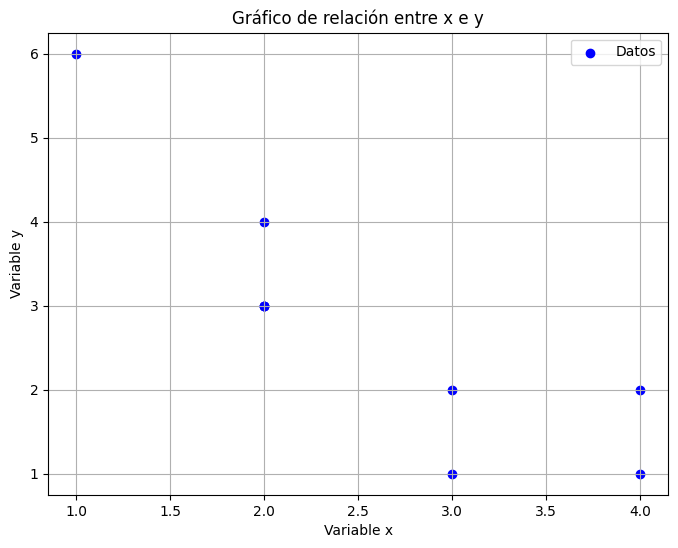

In [2]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = [3,2,2,4,1,4,3,2,2]
y = [1,3,3,2,6,1,2,3,4]

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Datos')

# Personalizar el gráfico
plt.title('Gráfico de relación entre x e y')
plt.xlabel('Variable x')
plt.ylabel('Variable y')
plt.grid(True)
plt.legend()

# Mostrar el gráfico
plt.show()

In [7]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'Genero': ['Hombre', 'Mujer', 'Hombre', 'Mujer', 'Hombre', 'Mujer'],
    'GrupoEdad': ['18-25', '18-25', '26-35', '26-35', '36-45', '36-45'],
    'Cantidad': [25, 30, 35, 40, 20, 15]
}

df = pd.DataFrame(data)

# Crear un cuadro de doble entrada (tabla cruzada)
tabla_cruzada = pd.crosstab(df['Genero'], df['GrupoEdad'], values=df['Cantidad'], aggfunc='sum', margins=True, margins_name='Total')

# Mostrar el cuadro de doble entrada
df

# Mi propia Tabla

,Genero,GrupoEdad,Cantidad
0,Hombre,18-25,25
1,Mujer,18-25,30
2,Hombre,26-35,35
3,Mujer,26-35,40
4,Hombre,36-45,20
5,Mujer,36-45,15


In [19]:
import pandas as pd

# Crear un DataFrame de ejemplo
Anova = {
    'GL': [1, 'n-2=8', 'n-1'],
    'SC': ['SCR=224.02', 'SCE=75.8', 'SCT=299.32'],
    'CM': [224.02, 9.48, 0],  
    'FC': [23.63, 0, 0],   
    'FTAB': [5.318, 0, 0]  
}
df = pd.DataFrame(Anova, index=['Regresion', 'Residual(Error)', 'Total'])

# Mostrar el DataFrame
df


,GL,SC,CM,FC,FTAB
Regresion,1,SCR=224.02,224.02,23.63,5.318
Residual(Error),n-2=8,SCE=75.8,9.48,0.00,0.000
Total,n-1,SCT=299.32,0.00,0.00,0.000


In [3]:
import numpy as np

# Definir la primera matriz (3x3)
matriz_3x3 = np.array([[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]])

# Definir la segunda matriz (3x1)
matriz_3x1 = np.array([[1],
                       [2],
                       [3]])

# Calcular el producto de matrices
producto = np.dot(matriz_3x3, matriz_3x1)

print("Matriz 3x3:")
print(matriz_3x3)
print("\nMatriz 3x1:")
print(matriz_3x1)
print("\nProducto de matrices:")
print(producto)

Matriz 3x3:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matriz 3x1:
[[1]
 [2]
 [3]]

Producto de matrices:
[[14]
 [32]
 [50]]


In [10]:
import numpy as np

# Definir una matriz
matriz = np.array([[6, 18, 21],
                   [18, 70, 50],
                   [21, 50, 131]])

# Calcular la inversa de la matriz
matriz_inversa = np.linalg.inv(matriz)

# Definir la segunda matriz (3x1)
matriz_3x1 = np.array([[2985],
                       [11170],
                       [8535]])

# Calcular el producto de matrices
producto = np.dot(matriz_inversa,matriz_3x1)

print("Matriz original:")
print(matriz)
print("\nMatriz inversa:")
print(matriz_inversa)

print("\nMatriz 3x1:")
print(matriz_3x1)
print("\nProducto de matrices:")
print(producto)



Matriz original:
[[  6  18  21]
 [ 18  70  50]
 [ 21  50 131]]

Matriz inversa:
[[ 1.48024856 -0.29027963 -0.126498  ]
 [-0.29027963  0.07656458  0.01731025]
 [-0.126498    0.01731025  0.02130493]]

Matriz 3x1:
[[ 2985]
 [11170]
 [ 8535]]

Producto de matrices:
[[ 96.45805593]
 [136.48468708]
 [ -2.40346205]]
